NEW FILE FOR THE CAR SALES

-------------------------------------------------------------------

This is a supervised learning problem. We have the output of each observation and we are going to predict this output and come up with the best estimations possible for each observation.

In [ ]:
#Get path (independently from who is running the command)

import os
os.getcwd()

'c:\\Users\\Jaume\\Documents\\MDDB\\AI\\AI_Group11_Project\\AI_Group7_Assignment'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve
import matplotlib.pyplot as plt
from plotnine import *
import os
import datetime
import pickle
import json

**PHASE 0: READ AND CLEAN DATA**

In [108]:
os.listdir(os.path.join('..', 'car_prices')) # independent of the platform (unix, windows)

## We read the files
car_sales_data_path = os.path.join("..", "car_prices", "car_prices.csv")
df = pd.read_csv(car_sales_data_path, on_bad_lines= "skip")

In [109]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [110]:
# We are going to check if there are NaN values

# Count NaN values in each column
nan_counts = df.isna().sum()

# Display the count of NaN values
print("\nCount of NaN values in each column:")
print(nan_counts)

#We drop the NaN values

df = df.dropna()


Count of NaN values in each column:
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [111]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558805,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,3.9,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300,22800,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


**PHASE 1: DESCRIPTIVE ANALYSIS**

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472336 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472336 non-null  int64  
 1   make          472336 non-null  object 
 2   model         472336 non-null  object 
 3   trim          472336 non-null  object 
 4   body          472336 non-null  object 
 5   transmission  472336 non-null  object 
 6   vin           472336 non-null  object 
 7   state         472336 non-null  object 
 8   condition     472336 non-null  float64
 9   odometer      472336 non-null  float64
 10  color         472336 non-null  object 
 11  interior      472336 non-null  object 
 12  seller        472336 non-null  object 
 13  mmr           472336 non-null  int64  
 14  sellingprice  472336 non-null  int64  
 15  saledate      472336 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 61.3+ MB


In [113]:
df.isnull().sum().sort_values(ascending = False)


year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [114]:
numbers = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
categories = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']

In [115]:
df[numbers].describe()

,year,condition,odometer,mmr,sellingprice
count,472336.000000,472336.000000,472336.000000,472336.000000,472336.000000
mean,2010.211045,3.426576,66701.070003,13836.999773,13690.403670
std,3.822131,0.943659,51939.183430,9532.131753,9612.962279
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,2.700000,28137.000000,7425.000000,7200.000000
50%,2012.000000,3.600000,51084.000000,12300.000000,12200.000000
75%,2013.000000,4.200000,96589.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


Key observations:

1. **Year, Condition, Odometer:**
   - No issues with the minimum and maximum values.
   - All values in these columns make sense and fall within reasonable ranges.

2. **Year, Condition, Odometer, MMR, Selling Price:**
   - There is a difference between the mean and median for Year, Condition, Odometer, MMR, and Selling Price.
   - This difference could indicate the presence of outliers in the data, skewing the mean away from the median.
   - Outliers can significantly impact statistical measures, so it's important to investigate and possibly handle them during data preprocessing.

3. **MMR Column:**
   - The minimum range value in the MMR column is quite far from the mean and median.
   - Further review during preprocessing is needed to understand the nature of these extreme values.
   - Outliers in MMR may be indicative of rare cases or errors in the data and might need special treatment (e.g., removal or transformation).

4. **Anomaly in Minimum Selling Price:**
   - There is an anomaly in the minimum selling price value, suspected to be unknown data.
   - The data is imputed with a value of 1, or it might represent instances where the car is sold as part of a company program (gift).
   - Imputation of missing or unknown values is a common preprocessing step, and using a value of 1 might be reasonable if it indicates a placeholder or default value.

**PHASE 2: DATA MODELLING**

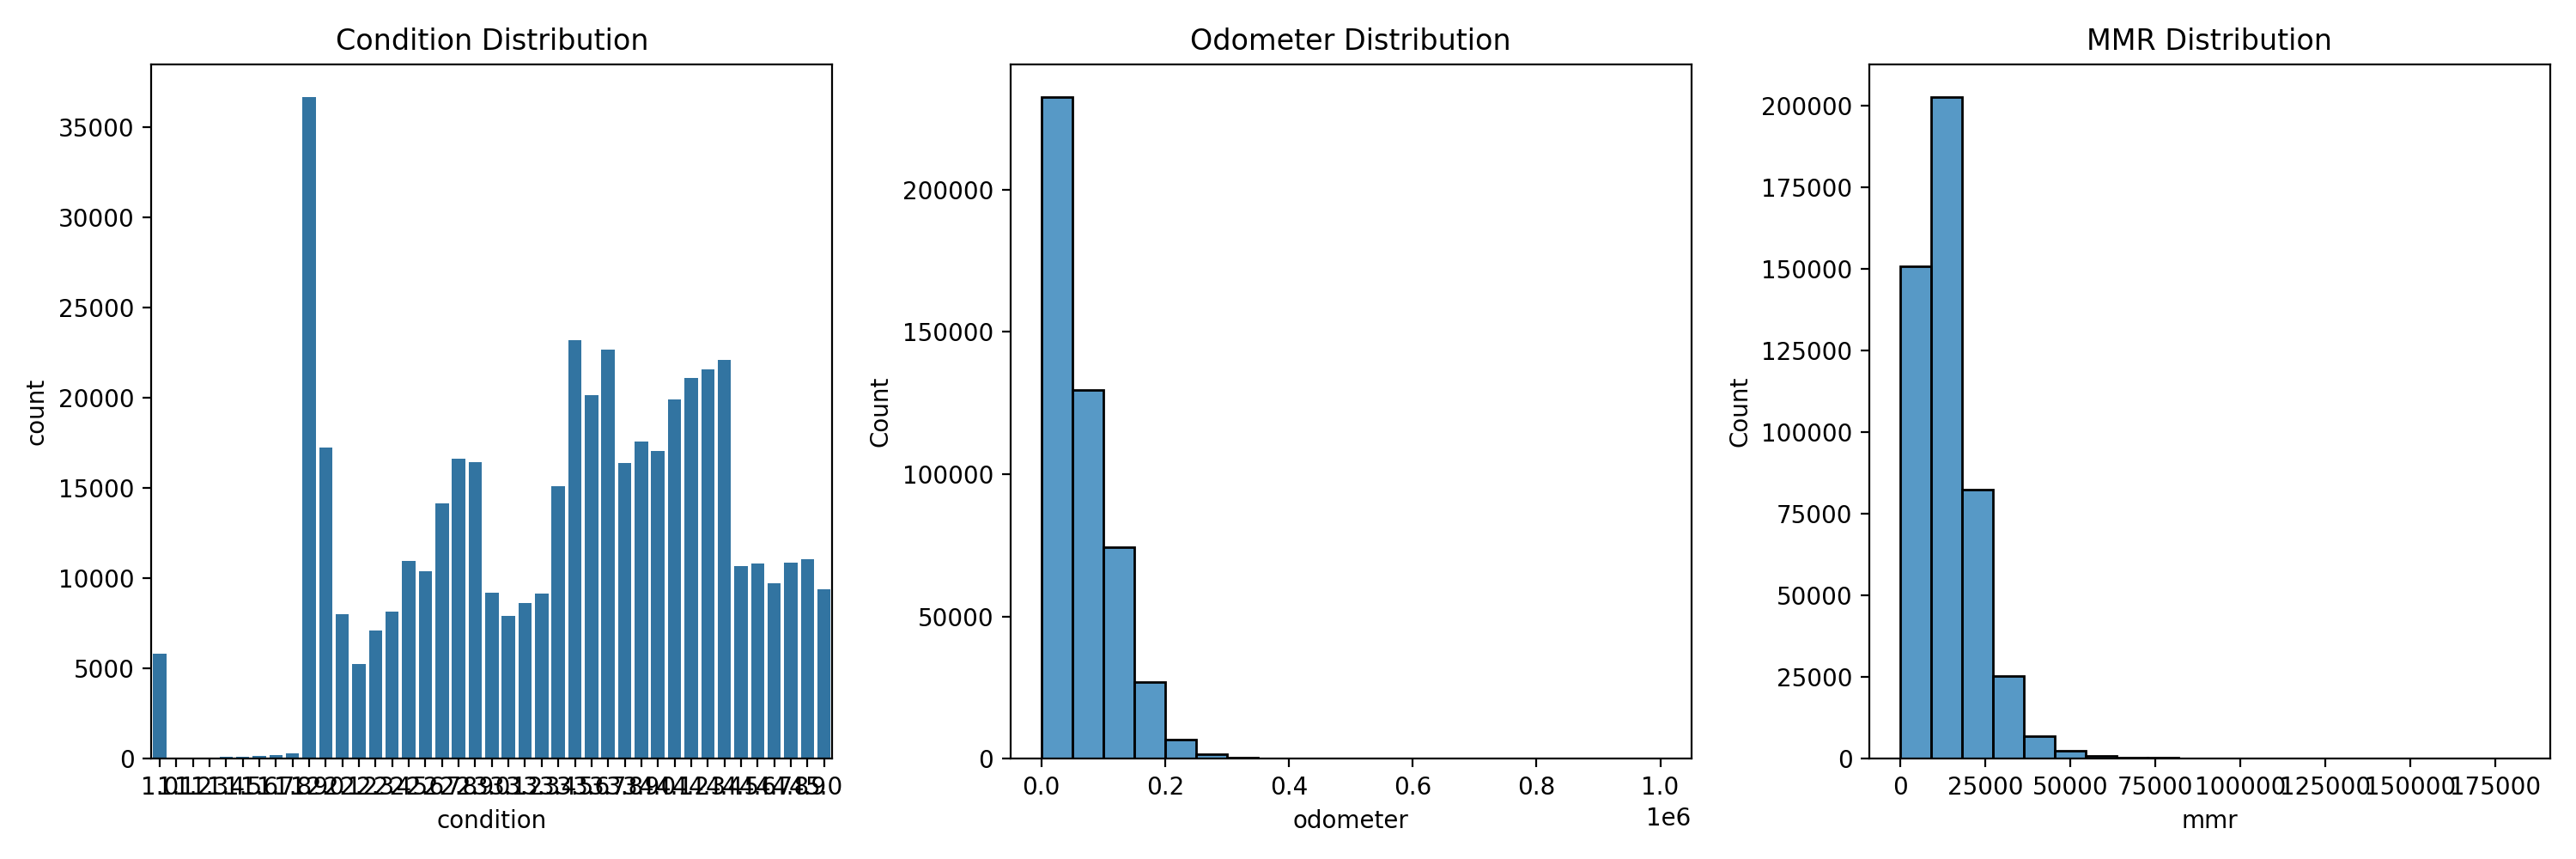

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 1x3 grid for subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for 'condition'
sns.countplot(x='condition', data=df, ax=axes[0])
axes[0].set_title('Condition Distribution')

# Plot for 'odometer'
sns.histplot(x='odometer', data=df, ax=axes[1], bins=20)
axes[1].set_title('Odometer Distribution')

# Plot for 'mmr'
sns.histplot(x='mmr', data=df, ax=axes[2], bins=20)
axes[2].set_title('MMR Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
        

In [117]:
#We drop columns that we are not going to use

df.drop('mmr', axis=1, inplace=True)
df.drop('vin', axis=1, inplace=True)
df.drop('seller', axis=1, inplace=True)
df.drop('saledate', axis=1, inplace=True)

C:\Users\Jaume\AppData\Local\Temp\ipykernel_4376\2656904286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Jaume\AppData\Local\Temp\ipykernel_4376\2656904286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Jaume\AppData\Local\Temp\ipykernel_4376\2656904286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Jaume\AppData\Local\Temp\ipykernel_4376\2656904286.py:6: SettingWithCopyWarning: 
A value is trying 

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split

def train_val_test():
    
    # Define the size for each set
    train_size = 0.64
    validation_size = 0.16
    test_size = 0.20

    # Split the data into training and temp sets
    train_data, temp_data = train_test_split(df, test_size=(1 - train_size), random_state=42)

    # Split the temp set into validation and test sets
    validation_data, test_data = train_test_split(temp_data, test_size=(validation_size / (validation_size + test_size)), random_state=42)

    # Print the sizes of the sets
    print(f"Train set size: {len(train_data)}")
    print(f"Validation set size: {len(validation_data)}")
    print(f"Test set size: {len(test_data)}")

    # Now you can use train_data, validation_data, and test_data for your training, validation, and testing purposes

    return train_data, validation_data, test_data

train_data, validation_data, test_data = train_val_test()

# Count NaN values in each column
nan_counts = train_data.isna().sum()

# Display the count of NaN values
print("\nCount of NaN values in each column:")
print(nan_counts)


Train set size: 302295
Validation set size: 94467
Test set size: 75574

Count of NaN values in each column:
year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
sellingprice    0
dtype: int64


In [119]:
import pandas as pd

# Count unique values in each column
unique_counts = train_data.nunique()

# Print the result
print(unique_counts)


year                26
make                53
model              751
trim              1439
body                83
transmission         2
state               34
condition           41
odometer        135422
color               20
interior            17
sellingprice      1591
dtype: int64


In [120]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


#We standarize the columns wih more than two values through an ordinal scaler

def standarize_Data_Big_Columns (df):

    # Columns to encode
    columns_to_encode = ['make', 'model', 'trim', 'body', 'color', 'interior', 'state']

    # Initialize OrdinalEncoder
    encoder = OrdinalEncoder()

    # Fit and transform the specified columns 
    df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

    return df


train_data = standarize_Data_Big_Columns(train_data)



In [121]:
train_data = train_data.reset_index(drop=True)


In [122]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# We will now standarize the categorical columns so we can use them as features in out model

def standarize_Data_Transmission (df):

    # We extract the column to be encoded
    transmission_column = df[['transmission']]

    # Initialize the OneHotEncoder
    encoder = OneHotEncoder(sparse=False, drop='first')  # Use drop='first' to avoid the dummy variable trap

    # We fit and transform the data
    encoded_data = encoder.fit_transform(transmission_column)

    # Creation of a DataFrame with the encoded data and column names
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['transmission']))

    # We append the two dataframes horizontally
    dataframes = [df, encoded_df]
    df = pd.concat(dataframes, axis=1, ignore_index=False)

    return df

train_data = standarize_Data_Transmission(train_data)



c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [123]:
# We check that the values have been concatenated properly
train_data

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice,transmission_manual
0,2011,36.0,654.0,881.0,11.0,automatic,22.0,4.2,63661.0,1.0,6.0,21800,0.0
1,2004,50.0,459.0,636.0,24.0,automatic,11.0,2.8,175370.0,2.0,1.0,1900,0.0
2,2012,11.0,26.0,1134.0,24.0,manual,25.0,3.6,24030.0,8.0,3.0,9100,1.0
3,2013,50.0,653.0,995.0,34.0,automatic,4.0,4.3,24981.0,2.0,13.0,20800,0.0
4,2012,18.0,52.0,797.0,35.0,automatic,25.0,3.2,33494.0,7.0,6.0,13000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302290,2012,36.0,60.0,99.0,35.0,automatic,18.0,4.6,32885.0,17.0,1.0,12500,0.0
302291,2006,14.0,253.0,807.0,11.0,automatic,13.0,1.9,187302.0,19.0,6.0,8000,0.0
302292,2013,20.0,282.0,604.0,19.0,automatic,9.0,4.1,39710.0,17.0,1.0,20000,0.0
302293,2006,14.0,277.0,1020.0,35.0,automatic,16.0,2.5,163172.0,0.0,1.0,2500,0.0


In [124]:
# We drop the transmission column that we are not going to use anymore
train_data.drop('transmission', axis=1, inplace=True)

train_data

,year,make,model,trim,body,state,condition,odometer,color,interior,sellingprice,transmission_manual
0,2011,36.0,654.0,881.0,11.0,22.0,4.2,63661.0,1.0,6.0,21800,0.0
1,2004,50.0,459.0,636.0,24.0,11.0,2.8,175370.0,2.0,1.0,1900,0.0
2,2012,11.0,26.0,1134.0,24.0,25.0,3.6,24030.0,8.0,3.0,9100,1.0
3,2013,50.0,653.0,995.0,34.0,4.0,4.3,24981.0,2.0,13.0,20800,0.0
4,2012,18.0,52.0,797.0,35.0,25.0,3.2,33494.0,7.0,6.0,13000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
302290,2012,36.0,60.0,99.0,35.0,18.0,4.6,32885.0,17.0,1.0,12500,0.0
302291,2006,14.0,253.0,807.0,11.0,13.0,1.9,187302.0,19.0,6.0,8000,0.0
302292,2013,20.0,282.0,604.0,19.0,9.0,4.1,39710.0,17.0,1.0,20000,0.0
302293,2006,14.0,277.0,1020.0,35.0,16.0,2.5,163172.0,0.0,1.0,2500,0.0


In [125]:
# We do the same for the Validation data than for the test_data

validation_data = standarize_Data_Big_Columns(validation_data)

validation_data = validation_data.reset_index(drop=True)

validation_data = standarize_Data_Transmission(validation_data)

c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


We are now going to build the ANN model.

we used Ricardo's tutorial code 

In [126]:
#We import the modules needed to build the ANN

import tensorflow
import keras

In [127]:
# import what we need from keras

from keras.models import Sequential
from keras.layers import Dense

In [128]:
# We standarize the data with a Standard Scaler 

def observedColumn (df):
    return df[['sellingprice']]

def featureColumns (df):
    return df[['year', 'make', 'model', 'trim', 'body', 'state', 'condition', 'odometer', 'color', 'interior', 'transmission_manual']]

# Separate features (X) and target variable (y) of the train data
X_train = featureColumns(train_data) # Features
Y_train = observedColumn(train_data) # Target variable

# Separate features (X) and target variable (y) of the validation data
X_val = featureColumns(validation_data) # Features
Y_val = observedColumn(validation_data) # Target variable


In [129]:
print(f"The number of neurons for the input layer must be: {X_train.shape[1]}")

The number of neurons for the input layer must be: 11


In [130]:
# Separate features (X) and target variable (y) of the validation data

#Number of features and neurons that the input layer will have
print(f"The number of neurons for the input layer must be: {X_train.shape[1]}")
 
# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_validation_scaled = scaler.fit_transform(X_val)

The number of neurons for the input layer must be: 11


In [131]:
# define the neural network model class instance
simple_nn = Sequential()
# add the first input layer with 11 nodes and the first hidden layer, with  relu activation function
# note that the first command does two things: create a first input layer with 11 nodes, and then a hidden layer
# we set the number of neurons to be equal to the (# of nodes in the input layer + # neurons in the output layer)/2,
# i.e. the mean of the number of neurons in the input layer and the output layer. This is usually a good heuristic to get started.
simple_nn.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
# add the output layer with sigmoid function (the sigmoid function is exactly the same as that used in the formulation of logisitc regression
simple_nn.add(Dense(1, activation='linear'))

In [132]:
print(simple_nn.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


After the model has been defined, it needs to be compiled to tensorflow code to be able to be trained.

Here we also need to choose the cost function to optimize for in the backpropagation algorithm.
Since we are doing classification, we will use cross entropy. 

As the algorithm for to do backpropagation, we will use adam. See https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/ for a gentle tutorial on stochastic gradient descent using adam.

In [133]:
simple_nn.compile(loss='mean_squared_error', optimizer='adam')

Note that we use the binary_crossentropy loss function in the above model. Remember that the loss function is the function that encodes the error of the prediction by the NN on a given observation w.r.t. the observation's true value. The gradient descent algorithm tries to adjust the weights of the neural network so that this error is minimized. 

The cross entropy function for a binary classification problem is defined as:

-(y log(p) + (1-y) log(1-p))

where y is the actual label (0 or 1), and p is the probability that the model predicts for the 1 (positive) class.

The underlying intuition is that the cross entropy loss increases the more the predicted probability for the correct class (in the range 0-1) differs from the correct class (either 0 or 1).

<div>
<img src="img/logloss.png" width="500">
</div>

See https://machinelearningmastery.com/cross-entropy-for-machine-learning/ for a more extensive discussion of the cross entropy and log loss functions.

Now that we have the compiled model, we can fit it on the training set. The interface here is similar to that of sklearn: we can call the .fit method on the compiled simple_nn model, and fit our model on the training set.

Note that training for a neural network model in keras goes a bit differently that for other machine learning algorithms. Here, training occurs over different **epochs**. Each **epoch** is split into **batches**. Epochs and batches are defined as:

- epoch: one forward-and-backprop pass through every row in the training set
- batch: the number of samples that are considered for each backpropagation update of the weights of the network

Each epoch consists of multiple weights update actions, one for each batch that the training dataset is divided into. There are two extreme cases: all the observations in training are in one single batch, or each individual observations is in its own separate batch.

In the first case, the model will:
1. calculate the error from all the observations in the unique batch 
2. use it do update the weights of the network
3. complete the epoch

In the second case, the model will:
1. calculate the error for the first batch (first observation)
2. update the weights of the network
3. calculate the error for the second batch (second observation)
4. update the error
5. repeat the steps above for all the observations in the training set
6. complete the epoch

Of course, these are two extreme cases. But one can set different values for the batch size, e.g., 10. Then the observations are grouped in groups of size 10 (the batches), and the algorithm loops though each batch, predicting, backpropagating, and updating the weights after each batch. When all batches are done, one epoch has passed.

Terminology:

- Batch Size = Size of Training Set -> Batch Gradient Descent
- Batch Size = 1 -> Stochastic Gradient Descent
- 1 < Batch Size < Size of Training Set -> Mini-Batch Gradient Descent


In [134]:
X_train.shape
Y_train.shape
X_val.shape
Y_val.shape

(94467, 1)

In [135]:
simple_nn.fit(X_train, Y_train, epochs=50, batch_size = 50)

Epoch 1/50


6046/6046 [==============================] - 16s 2ms/step - loss: 105483776.0000
Epoch 2/50
6046/6046 [==============================] - 13s 2ms/step - loss: 62129588.0000
Epoch 3/50
6046/6046 [==============================] - 13s 2ms/step - loss: 61561456.0000
Epoch 4/50
6046/6046 [==============================] - 14s 2ms/step - loss: 61300976.0000
Epoch 5/50
6046/6046 [==============================] - 14s 2ms/step - loss: 61105976.0000
Epoch 6/50
6046/6046 [==============================] - 14s 2ms/step - loss: 60956892.0000
Epoch 7/50
6046/6046 [==============================] - 14s 2ms/step - loss: 60875884.0000
Epoch 8/50
6046/6046 [==============================] - 14s 2ms/step - loss: 60732660.0000
Epoch 9/50
6046/6046 [==============================] - 14s 2ms/step - loss: 60702220.0000
Epoch 10/50
6046/6046 [==============================] - 14s 2ms/step - loss: 60582408.0000
Epoch 11/50
6046/6046 [==============================] - 16s 3ms/step - loss: 60527416.0000
Epoch 1

Note that when we fit the model, keras prints the value of the loss function at the end of each epoch. Here, the value of the loss function is calculated on the training set itself.
You can see that the loss is monotonically decreasing over the epochs, until it reaches a plateau:

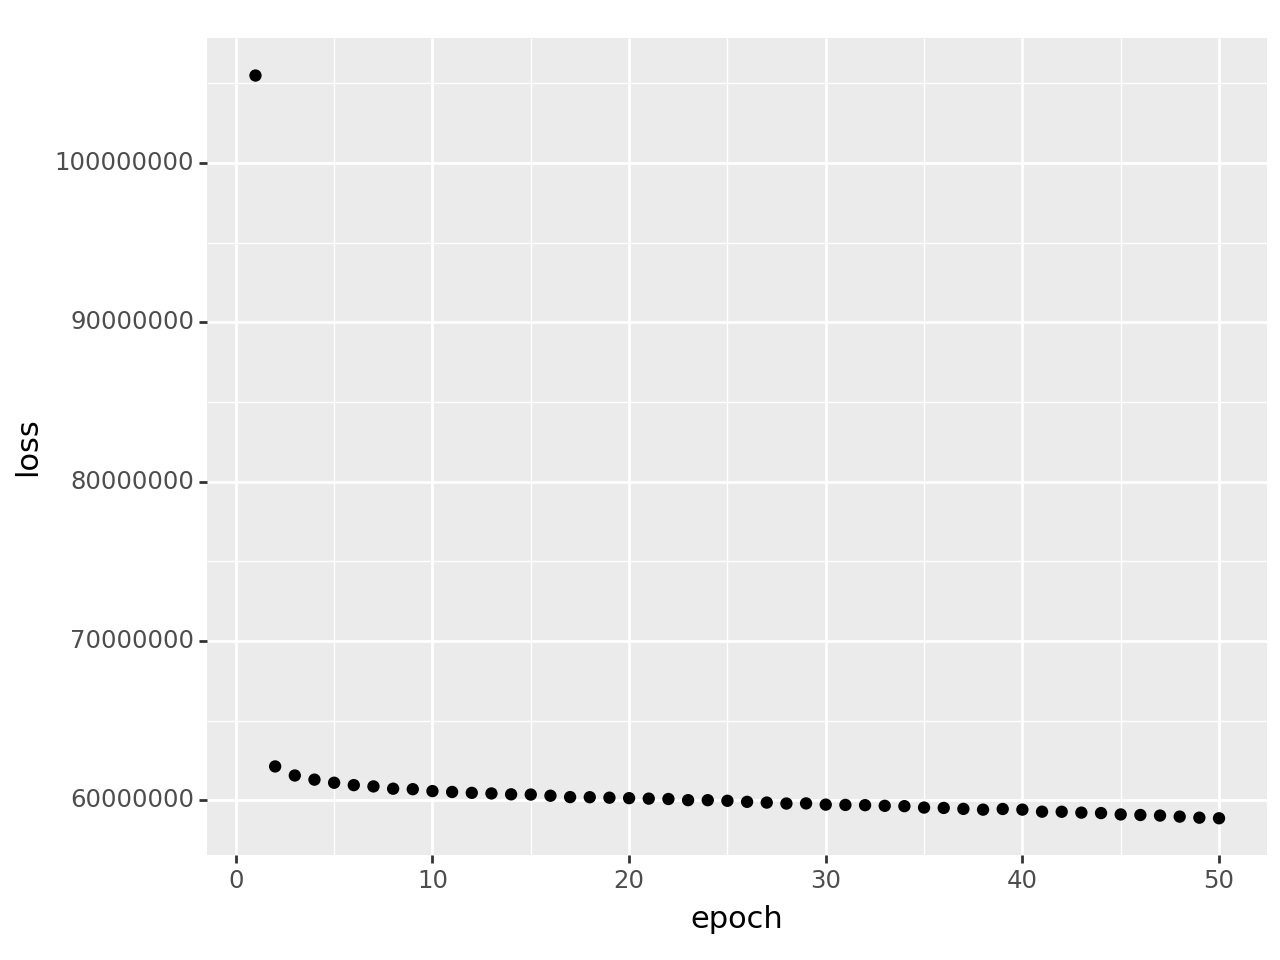

<Figure Size: (640 x 480)>

In [137]:
# see what information has been logged during the training process
simple_nn.history.history.keys()

# plot the training loss over epochs
loss_df = pd.DataFrame(simple_nn.history.history['loss'])
loss_df.columns = ['loss']
loss_df = loss_df.assign(epoch = np.arange(1, 51))

(
    ggplot(loss_df, aes(x='epoch', y='loss')) +
    geom_point()
)

We can see that the training loss is decreasing almost linearly after each epoch. This suggests that we could in principle increase the number of epochs to achieve better predictions.

However, note that this is the loss computed at the end of each epoch on the **training set**. Thus, just looking at this loss can lead to **overfitting**. Increasing the number of epochs radically will lower the loss on the training set, but the loss on a set that the model has not been trained on could be much worse if the model is just reducing the loss on the training set by learning noise.

We can provide our validation dataset to keras in order to evaluate, at the end of each epoch, the loss on the validation dataset. This will allow us to detect if the model starts to overfit, for instance.

In [138]:
simple_nn.fit(X_train, Y_train, epochs=50, batch_size = 50, validation_data= (X_val, Y_val))

Epoch 1/50
6046/6046 [==============================] - 17s 3ms/step - loss: 58834044.0000 - val_loss: 58553436.0000
Epoch 2/50
6046/6046 [==============================] - 17s 3ms/step - loss: 58773340.0000 - val_loss: 58377480.0000
Epoch 3/50
6046/6046 [==============================] - 17s 3ms/step - loss: 58763400.0000 - val_loss: 58771544.0000
Epoch 4/50
6046/6046 [==============================] - 17s 3ms/step - loss: 58687428.0000 - val_loss: 58613168.0000
Epoch 5/50
6046/6046 [==============================] - 18s 3ms/step - loss: 58586572.0000 - val_loss: 58144592.0000
Epoch 6/50
6046/6046 [==============================] - 17s 3ms/step - loss: 58528124.0000 - val_loss: 58679652.0000
Epoch 7/50
6046/6046 [==============================] - 18s 3ms/step - loss: 58519332.0000 - val_loss: 57987672.0000
Epoch 8/50
6046/6046 [==============================] - 18s 3ms/step - loss: 58406352.0000 - val_loss: 58342944.0000
Epoch 9/50
6046/6046 [==============================] - 18s 3ms/

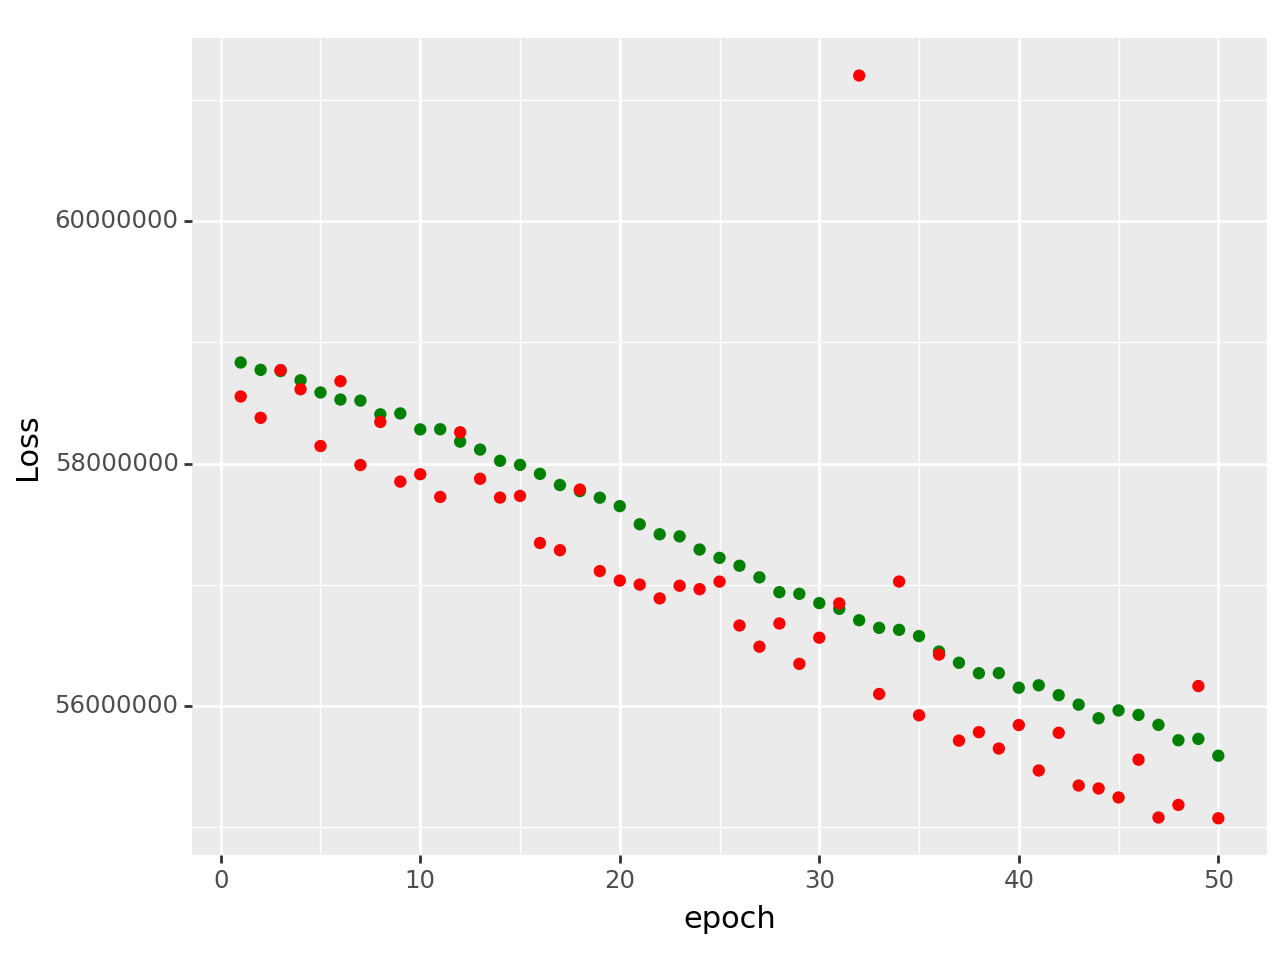

<Figure Size: (640 x 480)>

In [139]:
# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, 51))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn)

In [ ]:
# save the above simple nn fitted model to look at it later. We need to use the keras save command
# this command will save all the components of the model, in particular the architecture and the weights
# note: it will NOT save the training history. This needs to be saved separately.
simple_nn.save('../dataset/simple_nn_model')

print("Storing the fitting history of simple nn to disk")
with open('../dataset/simple_nn_history.json', 'w') as handle:
    json.dump(simple_nn.history.history, handle)

INFO:tensorflow:Assets written to: ../dataset/simple_nn_model\assets


INFO:tensorflow:Assets written to: ../dataset/simple_nn_model\assets


Storing the fitting history of simple nn to disk


In [ ]:
# we can load the above save model like this:
simple_nn = keras.models.load_model("../dataset/simple_nn_model")
simple_nn

# reload the fitting history like this
with open("../dataset/simple_nn_history.json", "r") as handle:
    simple_nn_history = json.load(handle)

In [ ]:

##  hyperparam tuning

## define the epoch. look at ricardo's model. Modelling notebook. 